In [1]:
from appgeopy import *

<AxesSubplot: xlabel='date'>

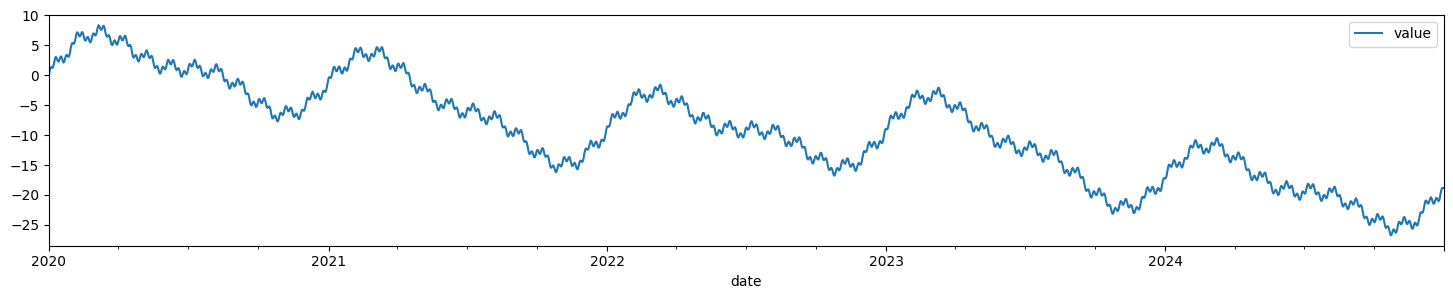

In [2]:
one_year = 365.25
amplitude_list = [1, 2.5, 5, 2.5, 1, 0.5]
period_list = [5, 2.5, 1, 0.5, 1 / 12, 7 / 365]
# amplitude_list = [
#     1,
# ]
# period_list = [
#     5,
# ]
df = modeling.synthetic_daily_signal(
    linear_slope=-0.01,
    amplitude_list=amplitude_list,
    period_list=period_list,
    variance=0.01,
    random_seed=42,
)
df.plot(figsize=(18, 3))

#### Test show peak-to-peak for entire time-series

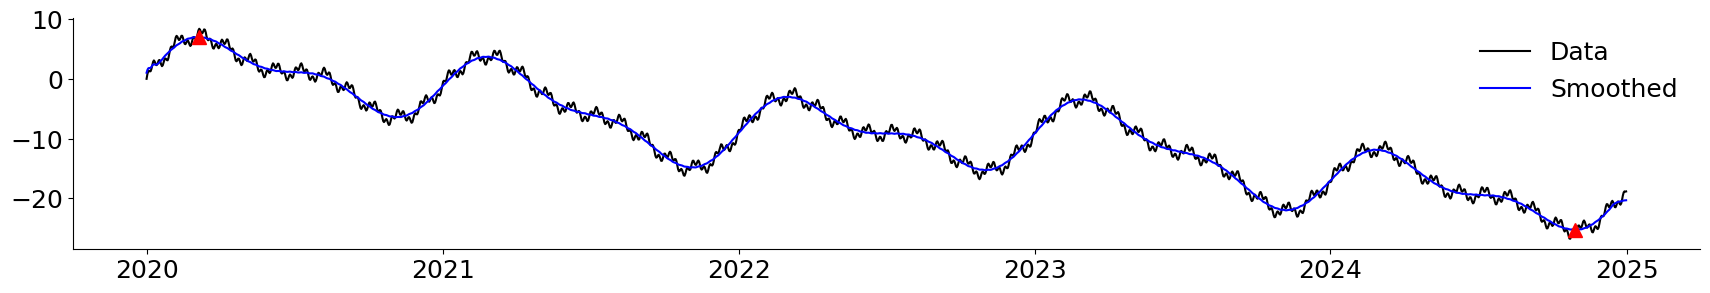

In [3]:
smoothed_signal = pd.DataFrame(
    data=smoothing.simple_moving_average(df.values, window_size=31),
    index=df.index,
    columns=["value"],
)

peak_idx, trough_idx = analysis.find_peaks_troughs(smoothed_signal.iloc[:, 0])
peak_to_peak_df = analysis.find_peak_to_peak(smoothed_signal, peak_idx, trough_idx)


fig = plt.figure(figsize=(21, 3))
ax = fig.add_subplot(111)
visualize.base_plot(ax=ax, data=df, label="Data", color="black")

visualize.base_plot(ax=ax, data=smoothed_signal, label="Smoothed", color="blue")

visualize.base_plot(
    ax=ax, data=peak_to_peak_df, marker="^", linestyle=" ", color="red", ms=10
)

# peak_idx, trough_idx = analysis.find_peaks_troughs(df.iloc[:, 0])
# peak_to_peak_df = analysis.find_peak_to_peak(df, peak_idx, trough_idx)

# visualize.base_plot(
#     ax=ax, data=peak_to_peak_df, marker="s", linestyle=" ", color="blue", ms=10
# )

plt.show()

#### Test show peak-to-peak for every year

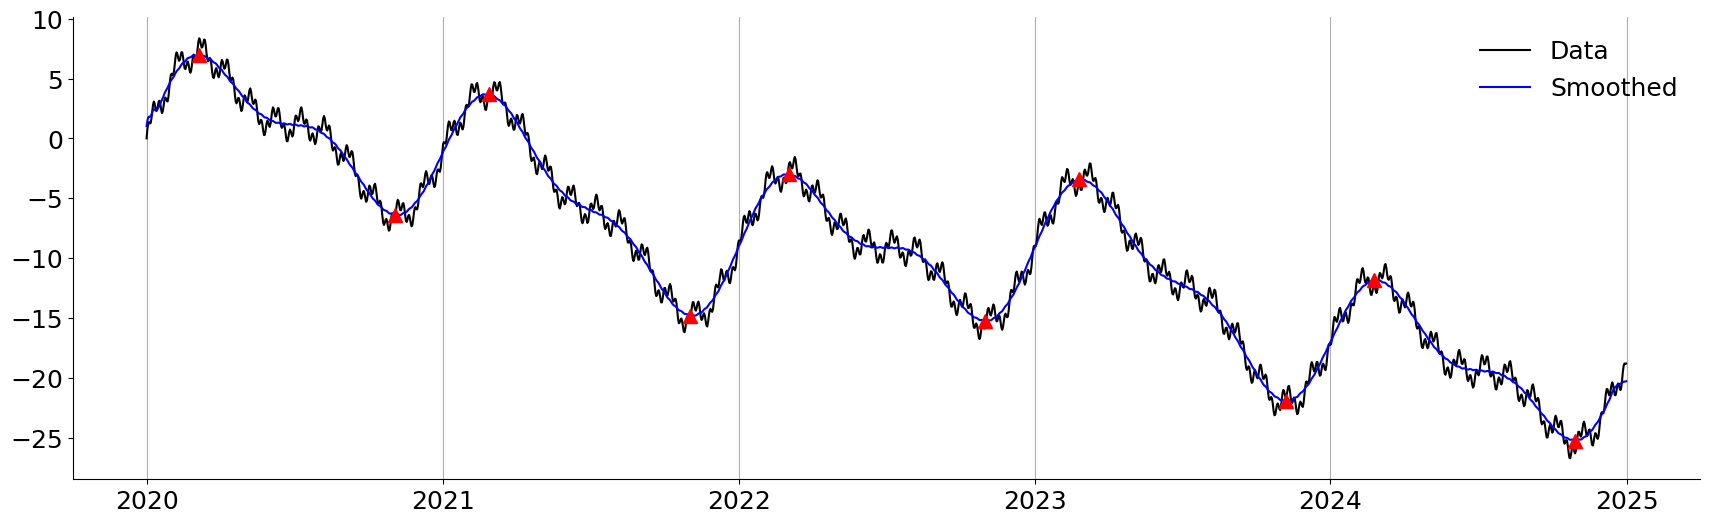

In [15]:
smoothed_signal = pd.DataFrame(
    data=smoothing.simple_moving_average(df.values, window_size=31),
    index=df.index,
    columns=["value"],
)

fig = plt.figure(figsize=(21, 6))
ax = fig.add_subplot(111)
visualize.base_plot(ax=ax, data=df, label="Data", color="black")
visualize.base_plot(ax=ax, data=smoothed_signal, label="Smoothed", color="blue")

for year in smoothed_signal.index.year.unique():
    select_df = smoothed_signal.loc[str(year), :]
    peak_idx, trough_idx = analysis.find_peaks_troughs(select_df.iloc[:, 0])
    peak_to_peak_df = analysis.find_peak_to_peak(select_df, peak_idx, trough_idx)
    visualize.base_plot(
        ax=ax, data=peak_to_peak_df, marker="^", linestyle=" ", color="red", ms=10
    )

ax.grid(axis="x", which="major")